In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, f_classif, f_regression, SelectKBest, SelectPercentile

In [5]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), done.


In [6]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
X = data.drop('TARGET', axis=1)
Y = data['TARGET']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [10]:
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T

In [12]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [13]:
duplicated_features = x_train_T.duplicated()

In [14]:
features_to_keep = [not index for index in duplicated_features]

In [15]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [16]:
x_train_unique.shape, x_test_unique.shape

((60816, 251), (15204, 251))

**Perform F test**

In [17]:
sel = f_classif(x_train_unique, y_train)

In [19]:
sel # first dimension of the array gives the F-score and the 2nd dimension the p-value

(array([6.41344846e-02, 1.83457645e+00, 6.12979991e+02, 5.93292297e-02,
        6.10119634e+00, 8.86941517e-01, 1.46877332e+00, 1.47463579e-01,
        3.20100704e+01, 3.35717641e+01, 1.64288104e+00, 5.12094483e+00,
        7.91763701e-01, 5.02623945e+01, 2.66218720e+01, 4.41329874e+01,
        5.44048703e+01, 2.88560064e+01, 4.44797435e+01, 1.06857549e-02,
        1.81358127e+00, 8.26257160e+01, 1.08061107e+03, 1.57794922e+02,
        4.58805601e+01, 8.16904590e+01, 6.54623702e+01, 8.90339974e+01,
        6.55026983e+01, 6.67993264e+01, 9.05921068e+01, 2.14476775e+01,
        5.14949193e+01, 5.82718548e+01, 3.87007481e+01, 2.39437654e+01,
        3.87033113e+01, 2.45743537e+01, 1.32216412e+03, 2.01861745e-01,
        4.81609684e-01, 6.47767538e+01, 1.86138050e+00, 6.17564462e+01,
        2.32380751e+00, 9.51107190e+00, 3.70142868e+02, 6.64903776e+01,
        1.06245373e+03, 1.57440055e+02, 4.58805601e+01, 7.84881246e+01,
        6.49046013e+01, 8.24815712e+01, 6.52307995e+01, 6.677282

In [20]:
p_values = pd.Series(sel[1])
p_values.index = x_train_unique.columns

In [21]:
p_values

0       8.000775e-01
1       1.755930e-01
2      1.172549e-134
3       8.075601e-01
4       1.351176e-02
           ...      
262     4.317285e-01
263     5.597493e-01
264     3.665520e-01
265     3.504624e-01
266     4.928520e-06
Length: 251, dtype: float64

In [22]:
p_values.sort_values(ascending=True,inplace=True)

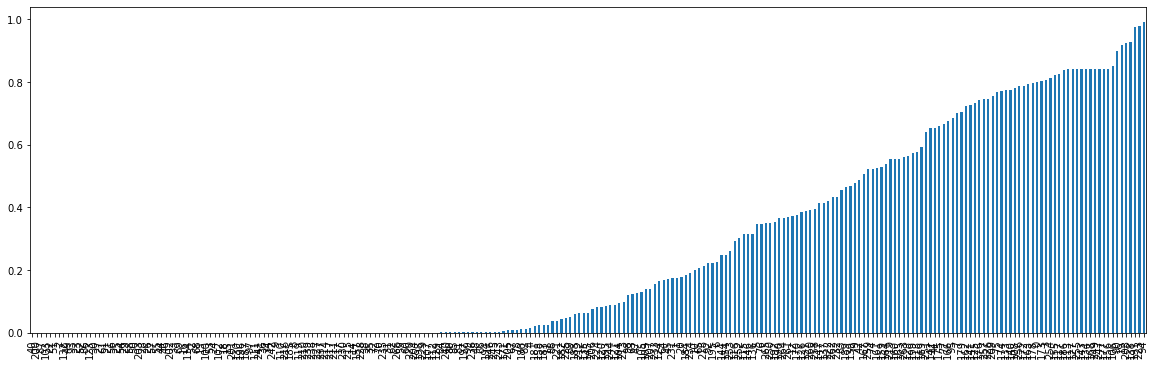

In [26]:
p_values.plot.bar(figsize=(20,6)) # Take only values which has p-values < 0.05

In [27]:
p_values = p_values[p_values <0.05]

In [28]:
p_values.index

Int64Index([ 40, 200,  87, 103,  22,  51,   2, 132,  49,  93,
            ...
              4, 181, 158, 183,  11,  88, 221, 182, 225,  89],
           dtype='int64', length=122)

In [29]:
x_train_p = x_train_unique[p_values.index]
x_test_p = x_test_unique[p_values.index]

In [30]:
def run_random_forest(x_train, x_test, y_train, y_test):
  clf = RandomForestClassifier()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('Model Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [31]:
%%time
run_random_forest(x_train, x_test, y_train, y_test)

Model Accuracy on test set:  0.9564588266245725
CPU times: user 19.4 s, sys: 24.3 ms, total: 19.5 s
Wall time: 19.4 s


In [32]:
%%time
run_random_forest(x_train_p, x_test_p, y_train, y_test)

Model Accuracy on test set:  0.9510655090765588
CPU times: user 13.4 s, sys: 30.1 ms, total: 13.5 s
Wall time: 13.5 s
